# Random Sample Distributions

### Importing Packages

In [ ]:
import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy
import scipy.stats as stats
import statistics
from scipy import optimize
from astropy.io import fits
from astropy.table import Table
from scipy import interpolate
%matplotlib inline
from matplotlib.patches import Rectangle


np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision = 40, suppress = True) #prevents scientific notation for 40 character numbers

/opt/anaconda3/envs/Git_JupyterLab/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
### Read in data file

low_vtan_sample = fits.open('/Users/edm/Library/CloudStorage/Dropbox/Data/Everett_BD_Sample_for_flybys_sheet.fits')
low_vtan = Table(low_vtan_sample[1].data)

In [ ]:
low_vtan.show_in_browser(jsviewer=True)  

## Bimodal Radial Velocity Distribution

(array([ 19., 127., 341., 298., 118.,  11.,   7.,  80., 243., 352., 180.,
         48.,   3.]),
 array([-191.1654087853245   , -159.92171736361354  ,
        -128.6780259419026   ,  -97.43433452019164  ,
         -66.19064309848068  ,  -34.946951676769714 ,
          -3.7032602550587796,   27.540431166652183 ,
          58.78412258836315  ,   90.02781401007408  ,
         121.27150543178507  ,  152.515196853496    ,
         183.75888827520694  ,  215.00257969691793  ]),
 <BarContainer object of 13 artists>)

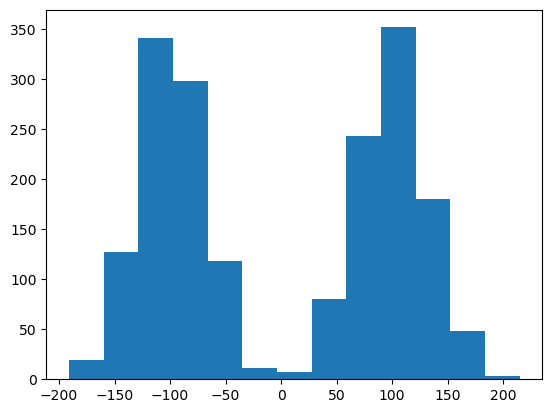

In [ ]:
##the mean and standard deviation respectively, as well as the nummber of data points in the normal distribution
mu, sigma = -100, 30
mu2, sigma2 = 100, 30
X1 = np.random.normal(mu, sigma, 913)
X2 = np.random.normal(mu2, sigma2, 914)
X_test = np.concatenate([X1, X2])

plt.hist(X_test, bins = 'auto')

In [ ]:
# cuts the histogras down to only contain values in the range of -100 to 100
n_sample = 913
amin, amax = 0, 100
sample = np.zeros((0,))    # empty for now
while sample.shape[0] < n_sample: 
    s = np.random.normal(100, 35.0237, size=(n_sample))
    Constraint = s[(s >= amin) & (s <= amax)]
    sample = np.concatenate([sample, Constraint])
sample = sample[:n_sample]

In [ ]:
# cuts the histogras down to only contain values in the range of -100 to 100
n_samples = 914
amin, amax = -100, 0
samples2 = np.zeros((0,))    # empty for now
while samples2.shape[0] < n_samples: 
    s = np.random.normal(-100, 35.0237, size=(n_samples))
    Constraint2 = s[(s >= amin) & (s <= amax)]
    samples2 = np.concatenate([samples2, Constraint2])
samples2 = samples2[:n_samples]

(array([0.021010590315500968 , 0.024328051944264278 ,
        0.018798949229658895 , 0.022116410858422073 ,
        0.016587308143816554 , 0.020457680044040416 ,
        0.014928577329435005 , 0.02266932112988262  ,
        0.019351859501119312 , 0.02266932112988262  ,
        0.025433872487185382 , 0.01990476977257986  ,
        0.016034397872356117 , 0.017140218415277103 ,
        0.01990476977257986  , 0.021010590315501117 ,
        0.020457680044040416 , 0.014375667057974346 ,
        0.012164025972132139 , 0.01050529515775052  ,
        0.012716936243592691 , 0.012716936243592736 ,
        0.007740743800447724 , 0.007740743800447724 ,
        0.009399474614829414 , 0.00995238488628993  ,
        0.007740743800447753 , 0.00939947461482938  ,
        0.004423282171684429 , 0.004423282171684414 ,
        0.004976192443144984 , 0.005529102714605518 ,
        0.002764551357302759 , 0.002211641085842207 ,
        0.00387037190022389  , 0.0005529102714605517,
        0.004976192443144965

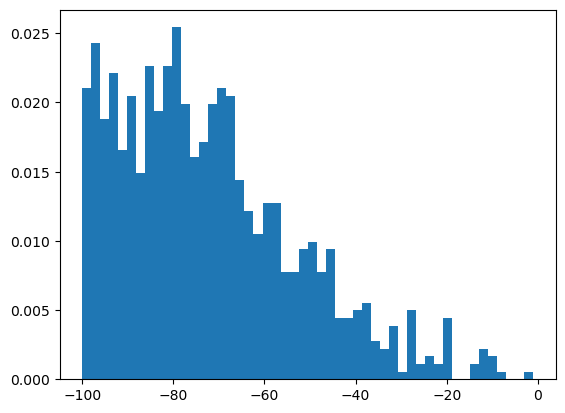

In [ ]:
from scipy.stats import norm
plt.hist(samples2, bins=50, density=True)

(array([0.001667655305022281 , 0.                   ,
        0.0005558851016740939, 0.                   ,
        0.0016676553050222816, 0.0011117702033481879,
        0.0027794255083704667, 0.0016676553050222803,
        0.0005558851016740939, 0.0011117702033481879,
        0.0016676553050222816, 0.0027794255083704697,
        0.0016676553050222816, 0.0033353106100445576,
        0.0033353106100445632, 0.002223540406696372 ,
        0.0055588510167409394, 0.006114736118415033 ,
        0.0044470808133927515, 0.0038911957117186576,
        0.006114736118415033 , 0.0044470808133927515,
        0.0044470808133927515, 0.011117702033481879 ,
        0.005002965915066845 , 0.010561816931807784 ,
        0.013341242440178204 , 0.009450046728459597 ,
        0.013341242440178253 , 0.008894161626785503 ,
        0.01278535733850416  , 0.01445301264352639  ,
        0.013341242440178253 , 0.01667655305022282  ,
        0.01278535733850416  , 0.01667655305022282  ,
        0.02001186366026738 

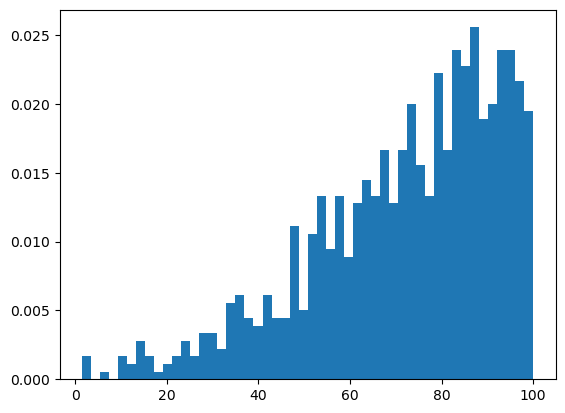

In [ ]:
from scipy.stats import norm
plt.hist(sample, bins=50, density=True)

In [ ]:
Bimodal_RV_dist = np.concatenate([sample, samples2])

Text(0.5, 0, 'Radial Velocity')

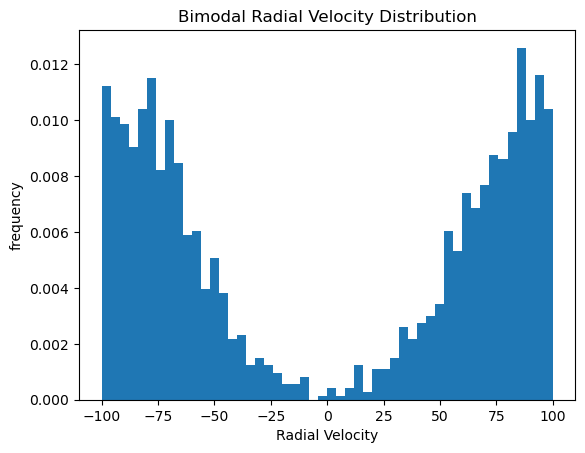

In [50]:
bimodal_dist = plt.hist(Bimodal_RV_dist, bins=50, density=True)
plt.title('Bimodal Radial Velocity Distribution')
plt.ylabel("frequency")
plt.xlabel("Radial Velocity")

In [ ]:
len(Bimodal_RV_dist)

1827

### Perihelion Time and Distance Calculation (Bim)

In [ ]:
#idx	name	plx_formula	plxerr_formula	ref_plx_formula	pmra_formula	pmraerr_formula	pmdec_formula	pmdecerr_formula	ref_pm_formula	ra_j2000_formula	dec_j2000_formula	source_j2000_formula	SpT	PMTOT	Distance	Vtan


In [ ]:
## pull out variables on interest

#source name
name = np.asarray(low_vtan['name'])

#radial velocity = X

# Kinematic values
Pmtot = np.asarray(low_vtan['PMTOT'])

Vtan = np.asarray(low_vtan['Vtan'])

plx = np.asarray(low_vtan['plx_formula'])
plxerr_formula_e = np.asarray(low_vtan['plxerr_formula'])

vtot = (np.sqrt(Vtan**2+Bimodal_RV_dist**2))

In [ ]:
c1 = 0.9779*10**9
c2 = 4.74047

bim_dist_t = (-c1*(1/plx)*(Bimodal_RV_dist/vtot**2))/10**6
bim_dist_d = 10**3*(1/plx)*(Vtan/vtot)

### Plot of Flybys using bimodal Distribution

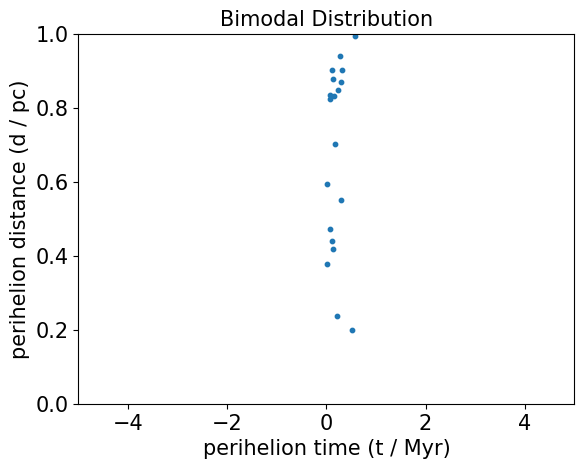

In [57]:
plt.scatter(bim_dist_t,bim_dist_d, 10)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.title("Bimodal Distribution", fontsize = 15)
plt.xlabel("perihelion time (t / Myr)", fontsize = 15)
plt.ylabel("perihelion distance (d / pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [ ]:
bim_minnum = np.argmin(bim_dist_d)
name[bim_minnum]
#WISE J054601.19-095947.5, SDSS J104928.24+253723.

'SDSS J104928.24+253723.2'

In [ ]:
bim_top10 = name[bim_dist_d<1]

In [ ]:
bim_top10

array(['Luhman 16', 'Proxima Centauri', 'LP 944-20',
       'WISE J192841.35+235604.9', '2MASSI J0652307+471034',
       'WISEA J082507.37+280548.2', 'ULAS J141623.94+134836.3',
       'WISE J003829.05+275852.1', 'WISE J072003.20-084651.2',
       'TVLM 513-46546', 'PSO J103.0927+41.4601', 'PSO J127.5648-11.1861',
       'WISEPA J031325.96+780744.2', '2MASSI J1711457+223204',
       'PSO J007.9194+33.5961', 'WISEPA J052844.51-330823.9',
       '2MASS J06395596-7418446', 'WISE J054601.19-095947.5',
       'SDSS J104928.24+253723.2'], dtype='<U28')

In [ ]:
np.where(name=='SDSS J104928.24+253723.2')

(array([1826]),)

In [ ]:
np.where(name=='WISEA J082507.37+280548.2')

(array([1756]),)

In [ ]:
bim_dist_d[1756]

0.47367019828542595

In [ ]:
bim_dist_t[1756]

0.06295010537838942

In [ ]:
np.where(name=='WISEPA J154151.66-225025.2')

(array([1066]),)

In [ ]:
bim_dist_d[1826]

0.20056164718618846

In [ ]:
bim_dist_t[1826]

0.5175361052583382

In [ ]:
low_vtan[1826]

<Row index=1826>
          name           plx_formula plxerr_formula ref_plx_formula pmra_formula pmraerr_formula pmdec_formula pmdecerr_formula ref_pm_formula ra_j2000_formula dec_j2000_formula source_j2000_formula   SpT      PMTOT      Distance      Vtan    
         str28             float32      float32          str15        float32        float32        float32        float32           str7          float64           float32              str7         float32   float64     float64     float64   
------------------------ ----------- -------------- --------------- ------------ --------------- ------------- ---------------- -------------- ---------------- ----------------- -------------------- ------- ----------- ----------- ------------
SDSS J104928.24+253723.2        21.3            1.1             DR2         -1.3             2.1          -1.1              2.4            DR2         162.3677           25.6231                  DR2    11.0 1.702938637 46.94835681 0.3789638093

In [ ]:
bim_top10_line_num = np.argsort(name[bim_dist_d<1])

In [ ]:
low_vtan[14]

<Row index=14>
           name           plx_formula plxerr_formula ref_plx_formula pmra_formula pmraerr_formula pmdec_formula pmdecerr_formula ref_pm_formula ra_j2000_formula dec_j2000_formula source_j2000_formula   SpT      PMTOT      Distance      Vtan   
          str28             float32      float32          str15        float32        float32        float32        float32           str7          float64           float32              str7         float32   float64     float64     float64  
------------------------- ----------- -------------- --------------- ------------ --------------- ------------- ---------------- -------------- ---------------- ----------------- -------------------- ------- ----------- ----------- -----------
WISEA J043535.82+211508.9        18.3            0.6             DR2        871.7             0.9        -964.1              0.6            DR2          68.8966           21.2553                  DR2   -10.0 1299.749861 54.64480874 336.6565213

In [ ]:
low_vtan[bim_minnum]

<Row index=1826>
          name           plx_formula plxerr_formula ref_plx_formula pmra_formula pmraerr_formula pmdec_formula pmdecerr_formula ref_pm_formula ra_j2000_formula dec_j2000_formula source_j2000_formula   SpT      PMTOT      Distance      Vtan    
         str28             float32      float32          str15        float32        float32        float32        float32           str7          float64           float32              str7         float32   float64     float64     float64   
------------------------ ----------- -------------- --------------- ------------ --------------- ------------- ---------------- -------------- ---------------- ----------------- -------------------- ------- ----------- ----------- ------------
SDSS J104928.24+253723.2        21.3            1.1             DR2         -1.3             2.1          -1.1              2.4            DR2         162.3677           25.6231                  DR2    11.0 1.702938637 46.94835681 0.3789638093

## Normal Velocity Distribution

In [ ]:
# cuts the histogras down to only contain values in the range of -100 to 100
n_samples = 1827
amin, amax = -100, 100
Rvel_normal_dist = np.zeros((0,))    # empty for now
while Rvel_normal_dist.shape[0] < n_samples: 
    s = np.random.normal(0, 35.0237, size=(n_samples))
    Constraint2 = s[(s >= amin) & (s <= amax)]
    Rvel_normal_dist = np.concatenate([Rvel_normal_dist, Constraint2])
Rvel_normal_dist = Rvel_normal_dist[:n_samples]

In [ ]:
Rvel_normal_dist.std()

34.00502622553451

Checking to see the distribution of values in the Rvel array

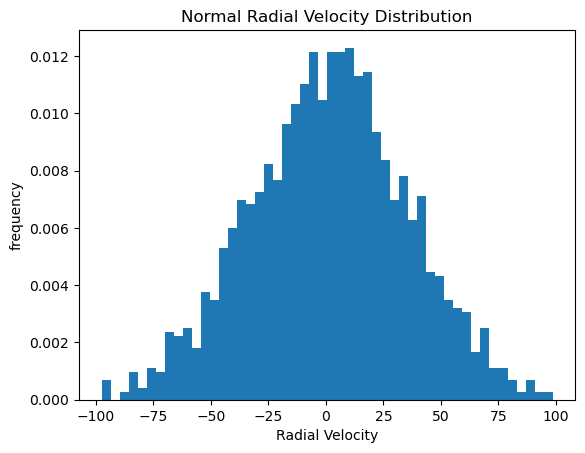

In [52]:
pdf, bins, patches = plt.hist(Rvel_normal_dist, bins=50, density=True)
plt.title('Normal Radial Velocity Distribution')
plt.ylabel("frequency")
plt.xlabel("Radial Velocity")
#plt.set_box_aspect(1)
plt.show()

### Perihelion time/distance Calculation (norm)

In [ ]:
low_vtan.show_in_browser(jsviewer=True)  

In [ ]:
## pull out variables on interest

#source name
name = np.asarray(low_vtan['name'])

#radial velocity
rv = Rvel_normal_dist

# Kinematic values
Pmtot = np.asarray(low_vtan['PMTOT'])
Vtan = np.asarray(low_vtan['Vtan'])
plx = np.asarray(low_vtan['plx_formula'])
vtot = (np.sqrt(Vtan**2+rv**2))

In [ ]:
c1 = 0.9779*10**9
c2 = 4.74047

norm_dist_t = (-c1*(1/plx)*(rv/vtot**2))/10**6
norm_dist_d = 10**3*(1/plx)*(Vtan/vtot)

In [ ]:
len(rv)

1827

### Plot of Flybys using normal distribution

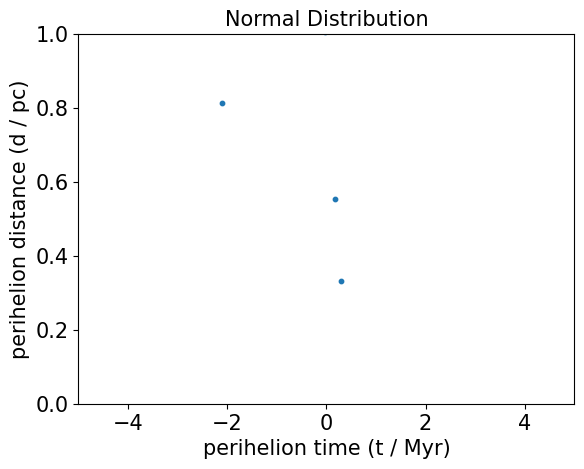

In [56]:
plt.scatter(norm_dist_t,norm_dist_d, 10)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.title("Normal Distribution", fontsize = 15)
plt.xlabel("perihelion time (t / Myr)", fontsize = 15)
plt.ylabel("perihelion distance (d / pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [ ]:
norm_minnum = np.argmin(norm_dist_d)

In [ ]:
name[norm_minnum]
#'WISE J054601.19-095947.5'

'WISE J054601.19-095947.5'

In [ ]:
low_vtan[norm_minnum]

<Row index=1824>
          name           plx_formula plxerr_formula ref_plx_formula pmra_formula pmraerr_formula pmdec_formula pmdecerr_formula ref_pm_formula ra_j2000_formula dec_j2000_formula source_j2000_formula   SpT      PMTOT    Distance     Vtan   
         str28             float32      float32          str15        float32        float32        float32        float32           str7          float64           float32              str7         float32   float64   float64    float64  
------------------------ ----------- -------------- --------------- ------------ --------------- ------------- ---------------- -------------- ---------------- ----------------- -------------------- ------- ----------- -------- -----------
WISE J054601.19-095947.5        50.0            4.0         Best20a         -7.9             2.8          -8.7              2.1        Best20a           86.505           -9.9965                  PS1    25.0 11.75159564     20.0 1.114051266

In [ ]:
norm_dist_d[1826]

0.8123339441632055

## SubPlot (time x distance vs distributions)

--------------

The subplot below shows the usual time vs distance plots, but it is with respect to the distributions that are used to derive the rv.

--------------

<Figure size 400x400 with 0 Axes>

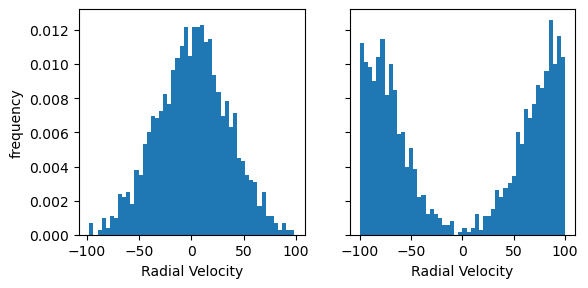

In [ ]:
plt.figure(figsize=(4, 4))

fig, ((ax1, ax2))  = plt.subplots(1, 2, sharey='row', gridspec_kw={'hspace': 0.4})

ax1.scatter(norm_dist_t, norm_dist_d, 3)
ax1.set_title("Normal Distribution")
ax1.set_ylabel("perihelion distance (/pc)")
ax1.set_xlabel("perihelion time (/Myr)")
ax1.set_xlim([-5, 5])
ax1.set_ylim([0, 1])
#ax1.set_box_aspect(1)

ax2.scatter(bim_dist_t, bim_dist_d, 3)
ax2.set_title("Bimodal Distribution")
ax2.set_xlabel("perihelion time (/Myr)")
ax2.set_xlim([-5, 5])
ax2.set_ylim([0, 1])
#ax2.set_box_aspect(1)

ax3.hist(Rvel_normal_dist, bins=50, density=True)
ax3.set_ylabel("frequency")
ax3.set_xlabel("Radial Velocity")
ax3.set_ylim([0, 0.009])
#ax3.set_box_aspect(1)

ax4.hist(Bimodal_RV_dist, bins=50, density=True)
ax4.set_ylim([0, 0.009])
ax4.set_xlabel("Radial Velocity")
#ax4.set_box_aspect(1)

In [ ]:
ax1.scatter(norm_dist_t, norm_dist_d, 3)
ax1.set_title("Normal Distribution")
ax1.set_ylabel("perihelion distance (/pc)")
ax1.set_xlabel("perihelion time (/Myr)")
ax1.set_xlim([-5, 5])
ax1.set_ylim([0, 1])
#ax1.set_box_aspect(1)

ax2.scatter(bim_dist_t, bim_dist_d, 3)
ax2.set_title("Bimodal Distribution")
ax2.set_xlabel("perihelion time (/Myr)")
ax2.set_xlim([-5, 5])
ax2.set_ylim([0, 1])
#ax2.set_box_aspect(1)


# <u>**Questions to Think About**</u>

## What does a comparison to the RV distribution look like using the data from GAIA and the UCD Sample?

### GAIA/UCD/LowVTan RV Normal Distribution 

In [41]:
GSample = fits.open('/Users/edm/Library/CloudStorage/Dropbox/Data/100pc_rvnotnull-Matched-Best.fits')
GSample_A3 = Table(GSample[1].data)

In [42]:
GSample_A3

<Table length=167020>
    SOURCE_ID_1            RA_1         RA_ERROR_1 ... teff_gspphot   vbroad 
       int64             float64         float64   ...   float32     float32 
------------------- ------------------ ----------- ... ------------ ---------
5853498713190525696 217.39232147200883 0.023999203 ...    2829.3542       nan
4472832130942575872 269.44850252543836 0.026238997 ...    3099.6335       nan
 762815470562110464 165.83095967577933 0.024125582 ...     3511.045 10.002441
4075141768785646848  282.4587890175222 0.029065154 ...     3117.376       nan
1926461164913660160  355.4800152581559  0.03218242 ...          nan       nan
6553614253923452800  346.5039166796005 0.017067203 ...    3376.0845  5.767302
1872046574983497216   316.753662752556 0.018972972 ...    3889.6328 6.9816794
1872046609345556480  316.7484792940004  0.03876041 ...    4353.7437 5.7024636
2154880616774131840  280.6830708352289 0.021600218 ...     3352.192       nan
2154880616774131712 280.68308624583415 0.030707553 ...    3179.6333       nan
                ...                ...         ... ...          ...       ...
4072503039634788736  280.0046318198612 0.015781714 ...     3620.593       nan
1997756625600681600 353.09671688774444 0.015836248 ...    3491.9302       nan
4191162991637325824  302.3955216980271 0.014745331 ...     5205.402       nan
5761035592009134848 132.65107615466013 0.046826992 ...          nan 20.349188
5055343362578489344 53.619121006456545 0.015574422 ...    3470.5942       nan
1407928457594520576 253.50218132917882   0.0172391 ...    3491.9934       nan
6832879006104020096 318.17681412703587  0.02378706 ...    3551.0818       nan
  71475475647268736  55.05770921046282 0.041410603 ...    3442.6294       nan
 473881441333817984  60.74761405694887 0.010009908 ...    5576.3228       nan
 518180210764160512  30.15544146978542 0.008064788 ...     3871.986       nan

In [43]:
Gaia_rv = np.asarray(GSample_A3["radial_velocity"])

In [45]:
Gaia_rv

array([ -21.942726      , -110.46822       ,  -85.11064       ,
        -11.11644       ,  -77.289825      ,    8.306988      ,
        -64.593544      ,  -65.97495       ,   -1.303306      ,
          0.87630755    ,   11.367275      ,   10.603611      ,
        -40.4267        ,    1.4918072     ,   17.353445      ,
        245.05313       ,   20.70994       ,  -21.797655      ,
         25.126139      ,  -28.292406      ,  -28.90487       ,
         -3.370759      ,    1.4739288     ,    3.932475      ,
         -2.085692      ,  155.60522       ,  -40.457607      ,
        -26.481712      ,   68.41321       ,   67.935905      ,
         10.672628      ,   12.723588      ,  -34.901894      ,
        -42.46972       ,  -44.062584      ,   -0.23150428    ,
         15.260383      ,   -9.467006      ,   -5.730343      ,
         29.956833      , -111.504585      ,   85.671814      ,
         42.286324      ,   15.581262      ,   27.816954      ,
         22.296476      ,    8.195142   

In [46]:
np.std(Gaia_rv)

35.0237

(-100.0, 100.0)

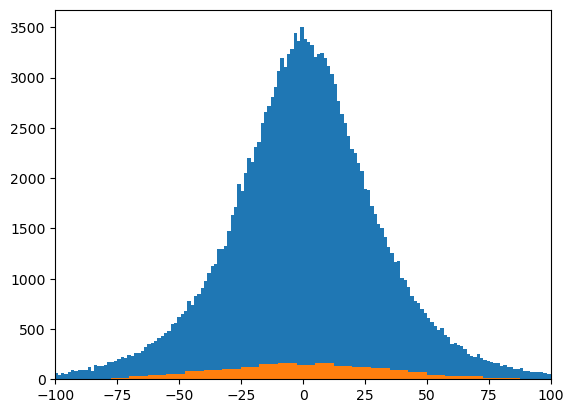

In [47]:
plt.hist(Gaia_rv, bins = 'auto')
pdf, bins, patches = plt.hist(Rvel_normal_dist, bins='auto')
plt.xlim(-100,100)

### Normal Random Histogram vs Gaia HIstogram

(-100.0, 100.0)

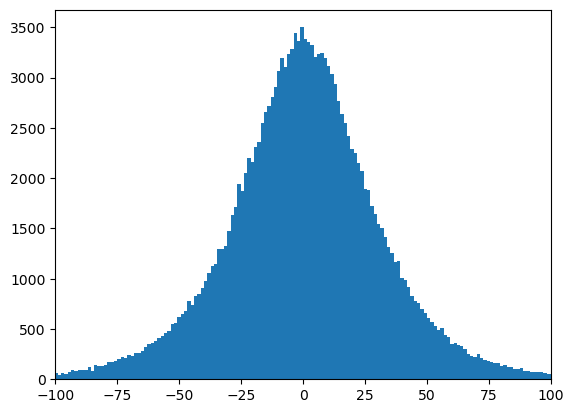

In [48]:
plt.hist(Gaia_rv, bins = 'auto')

plt.xlim(-100,100)

(array([1341.,  380.,   52.,   14.,   11.,    6.,    7.,   12.,    3.,
           1.]),
 array([  0.3789638093 ,  48.38422769837,  96.38949158744, 144.39475547651,
        192.40001936558, 240.40528325465, 288.41054714372, 336.41581103279,
        384.42107492186, 432.42633881093, 480.4316027    ]),
 <BarContainer object of 10 artists>)

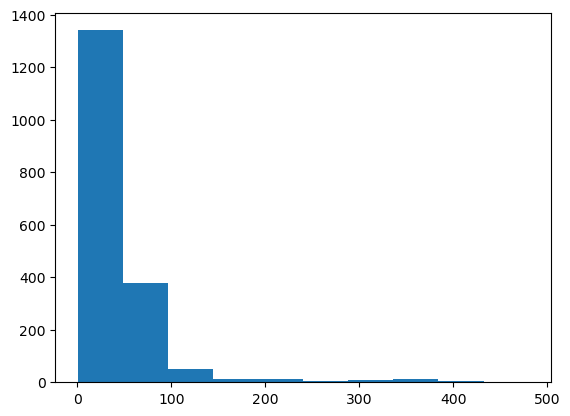

In [50]:
plt.hist(Vtan)

In [51]:
np.mean(Vtan)

42.64343114023498

In [52]:
#radial velocity
Gaia_rv = np.asarray(GSample_A3["radial_velocity"])

# PM RA and Dec
Gaia_PMD = np.asarray(GSample_A3['PMDEC_1'])
Gaia_PMR = np.asarray(GSample_A3['PMRA_1'])

#RA and DEc ICRS
Gaia_ra = np.asarray(GSample_A3['RA_1'])
Gaia_dec = np.asarray(GSample_A3['DEC_1'])

#parallax
Gaia_plx = np.asarray(GSample_A3['PARALLAX_1'])

#median distance

## read in temperature
Gaia_teff=np.asarray(GSample_A3['teff_gspphot'])
## temperature has no error

Gaia_source_id = np.asarray(GSample_A3["source_id_2"])

In [53]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_array = np.sqrt(Gaia_PMD**2+Gaia_PMR**2)
vtan_array = (c2/Gaia_plx)*pmtot_array
vtot_array = (np.sqrt(vtan_array**2+Gaia_rv**2))

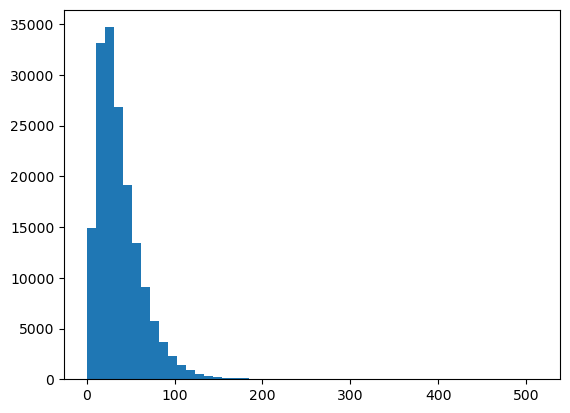

In [54]:
Gaia_vtan_hist = plt.hist(vtan_array, 50)

In [55]:
np.mean(vtan_array)

37.420357166713885

In [56]:
Gaia_t_per = -c1*(1/Gaia_plx*(Gaia_rv/vtot_array**2))/10**6
Gai_d_per = 10**3*(1/Gaia_plx)*(vtan_array/vtot_array)

### Time x Distance plot (Gaia and Norm RV dist)

(array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
 [Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$')])

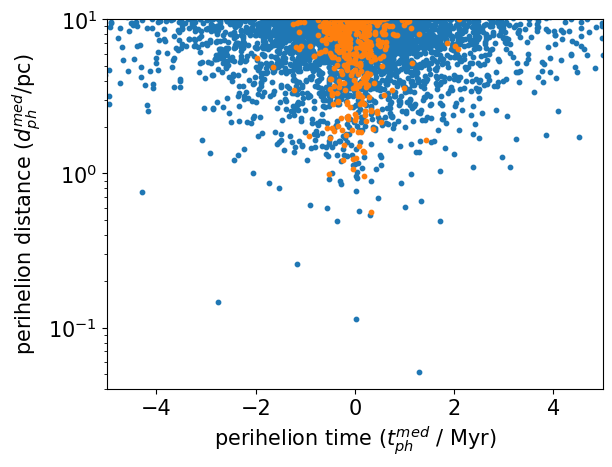

In [57]:
plt.scatter(Gaia_t_per, Gai_d_per, 10, )
plt.scatter(norm_dist_t,norm_dist_d, 10)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0.04,10)
plt.yscale('log')

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

---------

Loading in Dino's sample

---------

In [58]:
### Read in data file


GSampleBD = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/Mass Bd sampls (dino).fits')
GSample_BD2 = Table(GSampleBD[1].data)

In [59]:
GSample_BD2

<Table length=136>
   Name    f_Name   RAJ2000     DEJ2000    ... recno    SpT         Mass    
  str11     str1     str11       str12     ... int16   str12      float64   
---------- ------ ----------- ------------ ... ----- --------- -------------
J1438+6408        14 38 08.26 +64 08 36.30 ...    88        L0 0.07729007634
J1731+2721      c 17 31 29.74 +27 21 23.20 ...   115        L0 0.07729007634
J0024-0158        00 24 24.63 -01 58 19.90 ...     5      L0.5 0.07729007634
J0746+2000        07 46 42.49 +20 00 32.60 ...    50      L0.5 0.07729007634
J1221+0257        12 21 27.71 +02 57 19.70 ...    76      L0.5 0.07729007634
J0045+1634      b 00 45 21.41 +16 34 44.70 ...     9  L0{beta} 0.07729007634
J0015+3516        00 15 44.77 +35 16 02.60 ...     3        L1 0.07251908397
J0751-2530        07 51 16.30 -25 30 43.00 ...    51        L1 0.07251908397
J0921-2104        09 21 14.10 -21 04 44.40 ...    58        L1 0.07251908397
J1048+0111        10 48 42.81 +01 11 58.20 ...    65        L1 0.07251908397
       ...    ...         ...          ... ...   ...       ...           ...
J1707-0558        17 07 23.43 -05 58 24.90 ...   113     M9+L3  0.1498091603
J0109+2949        01 09 21.87 +29 49 26.40 ...    14      M9.5 0.07729007634
J0314+1603        03 14 03.44 +16 03 05.40 ...    25      M9.5 0.07729007634
J2234+2359        22 34 14.01 +23 59 55.80 ...   131      M9.5 0.07729007634
J0720-0846        07 20 03.25 -08 46 49.90 ...    48   M9.5+T5  0.1106870229
J0109-0343        01 09 51.20 -03 43 26.30 ...    15       M9e 0.07729007634
J0853-0329        08 53 36.16 -03 29 32.20 ...    57       M9e 0.07729007634
J1428+3310        14 28 43.22 +33 10 39.20 ...    87       M9e 0.07729007634
J0339-3525      e 03 39 35.25 -35 25 43.60 ...    29  M9{beta} 0.07729007634
J1331-0116        13 31 48.95 -01 16 50.10 ...    82 T0/L6blue 0.07729007634

In [60]:
## pull out variables on interest from the brown dwarf file

#radial velocity
rvbd = np.asarray(GSample_BD2["RV"])

rv_ebd = np.asarray(GSample_BD2["e_RV"]) 


# PM RA and Dec
PMDbd = np.asarray(GSample_BD2['pmDE'])
PMRbd = np.asarray(GSample_BD2['pmRA'])
PMR_ebd = np.asarray(GSample_BD2['e_pmRA'])
PMD_ebd = np.asarray(GSample_BD2['e_pmDE'])

#RA and DEc ICRS
dbd = np.asarray(GSample_BD2['Dist'])
plxbd = (1/dbd)*1000
d_ebd = np.asarray(GSample_BD2['e_Dist'])
#parallax
plxbd = np.asarray(plxbd)

#median distanc

## read in temperature
#teff=np.asarray(GSample_A2['teff_gspphot'])
## temperature has no error

source_idbd = np.asarray(GSample_BD2["Name"])

#name colomn
#Namebd = np.asarray(GSample_BD2['Name'])

Massbd = np.asarray(GSample_BD2['Mass'])

In [61]:
sdbd = dbd+d_ebd
splxbd = (1/sdbd)*1000

In [62]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_arraybd = np.sqrt(PMDbd**2+PMRbd**2)
vtan_arraybd = (c2/plxbd)*pmtot_arraybd
vtot_arraybd = (np.sqrt(vtan_arraybd**2+rvbd**2))


In [63]:
BD_t_per = -c1*(1/plxbd*(rvbd/vtot_arraybd**2))/10**6
BD_d_per = 10**3*(1/plxbd)*(vtan_arraybd/vtot_arraybd)

### Time x Distance Plot (Gaia, norm rv, UCD)

(array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
 [Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$')])

<Figure size 200x200 with 0 Axes>

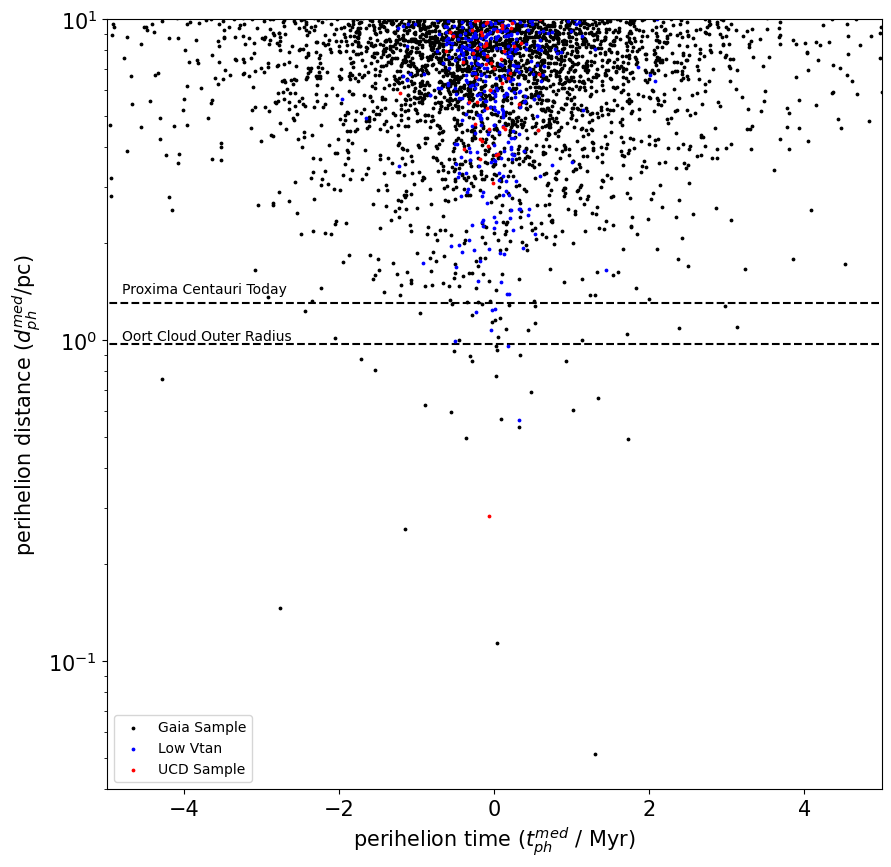

In [64]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black',linestyle='dashed',zorder=0)
plt.plot(np.arange(-20,20,1), np.zeros(40)+0.969627362,color='black',linestyle='dashed',zorder=0)

plt.scatter(Gaia_t_per, Gai_d_per, 3, facecolor = 'black', edgecolor = 'black', label='Gaia Sample')
plt.scatter(norm_dist_t,norm_dist_d, 3, facecolor = 'blue', edgecolor = 'blue', label='Low Vtan')
plt.scatter(BD_t_per,BD_d_per, 3, facecolor = 'red', edgecolor = 'red', label='UCD Sample')

plt.legend()

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0.04,10)
plt.yscale('log')

plt.text(-4.8,1.4,'Proxima Centauri Today')
plt.text(-4.8,1,'Oort Cloud Outer Radius')

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
 [Text(0, 0.001, '$\\mathdefault{10^{-3}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$')])

<Figure size 200x200 with 0 Axes>

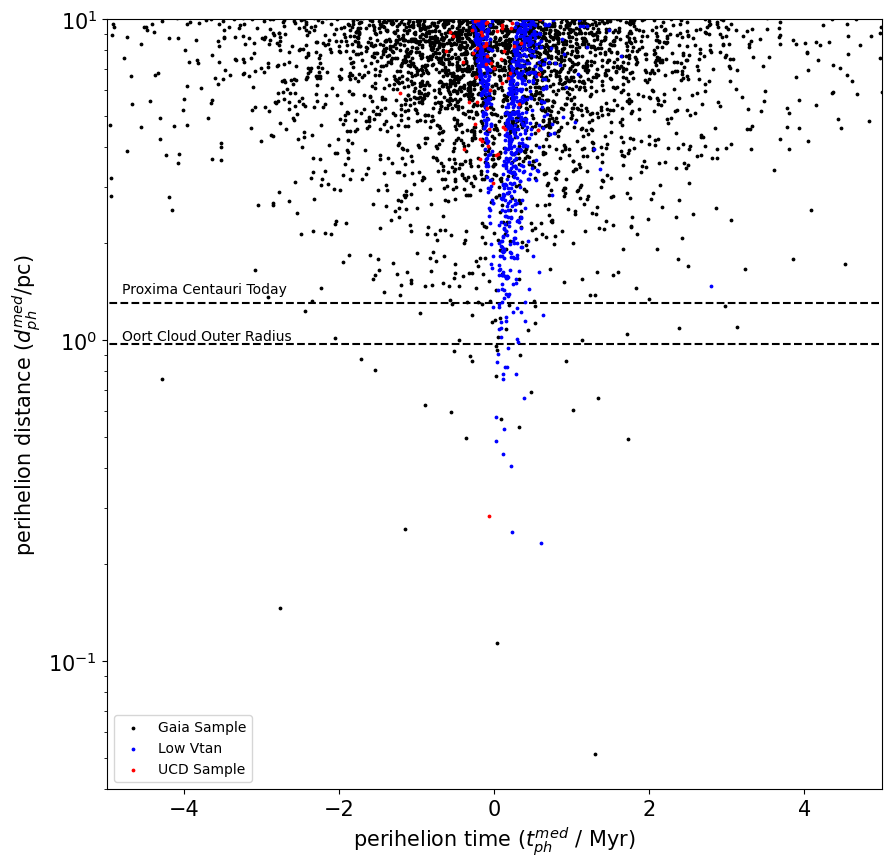

In [65]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black',linestyle='dashed',zorder=0)
plt.plot(np.arange(-20,20,1), np.zeros(40)+0.969627362,color='black',linestyle='dashed',zorder=0)

plt.scatter(Gaia_t_per, Gai_d_per, 3, facecolor = 'black', edgecolor = 'black', label='Gaia Sample')
plt.scatter(bim_dist_t,bim_dist_d, 3, facecolor = 'blue', edgecolor = 'blue', label='Low Vtan')
plt.scatter(BD_t_per,BD_d_per, 3, facecolor = 'red', edgecolor = 'red', label='UCD Sample')

plt.legend()

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0.04,10)
plt.yscale('log')

plt.text(-4.8,1.4,'Proxima Centauri Today')
plt.text(-4.8,1,'Oort Cloud Outer Radius')

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## Flyby rate analysis

In [66]:
Gaia_t_flyby = Gaia_t_per[Gai_d_per<=1]
norm_dist_t_flyby = norm_dist_t[norm_dist_d<=1]

In [67]:
Meg_year_regime = [1,2,3,4]

In [68]:
## calculates the number of flybys ever mega year in the gaia dist
x= [1,2,3,4]
Gaia_encounter_array = []
for i in x:
    flyby_number = -len(Gaia_t_flyby[Gaia_t_flyby <= (i - 1)]) + len(Gaia_t_flyby[Gaia_t_flyby<=i])
    Gaia_encounter_array.append(flyby_number)
number_of_flybys = np.hstack(Gaia_encounter_array)

In [69]:
## calculates the number of flybys ever mega year in the norm dist
x= [1,2,3,4]
norm_dist_array = []
for i in x:
    flyby_number = -len(norm_dist_t_flyby[norm_dist_t_flyby <= (i - 1)]) + len(norm_dist_t_flyby[norm_dist_t_flyby<=i])
    norm_dist_array.append(flyby_number)
number_of_flybys2 = np.hstack(norm_dist_array)

In [70]:
Gaia_encounter_array

[9, 5, 0, 0]

In [71]:
norm_dist_array

[2, 0, 0, 0]

In [72]:
Gaia_and_norm = np.add(Gaia_encounter_array,norm_dist_array)

In [73]:
Gaia_and_norm

array([11,  5,  0,  0])

In [74]:
UCD = np.asarray([1,0,0,0])

In [75]:
Gaia_norm_ucd = np.add(Gaia_and_norm, UCD)

In [76]:
Gaia_norm_ucd

array([12,  5,  0,  0])

Text(0, 0.5, 'Number of Flybys')

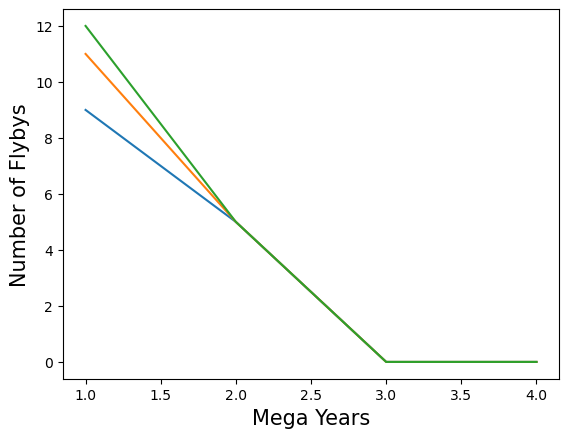

In [77]:
plt.plot(Meg_year_regime, Gaia_encounter_array)
plt.plot(Meg_year_regime, Gaia_and_norm)
plt.plot(Meg_year_regime, Gaia_norm_ucd)
plt.xlabel("Mega Years", fontsize = 15)
plt.ylabel("Number of Flybys", fontsize = 15)

In [78]:
slope_gaia, intercept_gaia = np.polyfit(Meg_year_regime, Gaia_encounter_array, 1)

In [79]:
slope_gaia

-3.200000000000001

In [80]:
slope_all, intercept_all = np.polyfit(Meg_year_regime, Gaia_norm_ucd, 1)

In [81]:
slope_all

-4.1000000000000005

### What does Coryn say about encounter rate of stellar flybys?

----------------------

We find that with all samples put together the rate of flybys is 8.6 flybys per mega year crudely calculated. Without brown dwarf samples we find 3.2 flybys per mega year. This is a stark 37.2 percent drop without brown dwarfs in concideration.

----------------------------------

In [82]:
len(Gaia_t_flyby[Gaia_t_flyby<0])



12

In [83]:
len(Gaia_t_flyby[Gaia_t_flyby<=1])

21

In [84]:
21-12

9

In [85]:
# Variables for Brown Dwarfs (J1416AB)

#radial velocity
#BD_rv=np.asarray(-86.95241909233778)
BD_rv=np.asarray(-50.4)

BD_ras = np.asarray(126.28054)
BD_decs = np.asarray(28.096472)

# PM RA and Dec
BD_PMD = np.asarray(-235.8)
BD_PMR = np.asarray(-66.7)

#parallax
BD_plx = np.asarray(152.6)

In [86]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_arraybd = np.sqrt(BD_PMD**2+BD_PMR**2)
vtan_arraybd = (c2/BD_plx)*pmtot_arraybd
vtot_arraybd = (np.sqrt(vtan_arraybd**2+BD_rv**2))

In [87]:
t_per = -c1*(1/BD_plx*(BD_rv/vtot_arraybd**2))/10**6
d_per = 10**3*(1/BD_plx)*(vtan_arraybd/vtot_arraybd)

In [88]:
t_per

0.12431197839658224

In [89]:
d_per

0.9786829497770274

In [90]:
# Variables for Brown Dwarfs (J1416AB)

#radial velocity
#BD_rv=np.asarray(-86.95241909233778)
BD_rv=np.asarray(-50.4)

BD_ras = np.asarray(126.28054)
BD_decs = np.asarray(28.096472)

# PM RA and Dec
BD_PMD = np.asarray(-235.8)
BD_PMR = np.asarray(-66.7)

#parallax
BD_plx = np.asarray(152.6)

In [91]:
### Read in data file

GSample = pd.read_csv('/Users/edm/Desktop/Untitled spreadsheet - Sheet1.csv')

In [92]:
# Variables for Brown Dwarfs (J1416AB)

#radial velocity
#BD_rv=np.asarray(-86.95241909233778)
name = np.asarray(GSample['Name'])
BD_rv = np.asarray(GSample['RV'])

BD_ras = np.asarray(GSample['RAN'])
BD_decs = np.asarray(GSample['DECN'])
# PM RA and Dec
BD_PMD = np.asarray(GSample['PMDec_1'])
BD_PMR = np.asarray(GSample['PMRA_1'])

#parallax
BD_plx = np.asarray(GSample['Parallax'])

In [93]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_arraybd = np.sqrt(BD_PMD**2+BD_PMR**2)
vtan_arraybd = (c2/BD_plx)*pmtot_arraybd
vtot_arraybd = (np.sqrt(vtan_arraybd**2+BD_rv**2))

In [94]:
t_per = -c1*(1/BD_plx*(BD_rv/vtot_arraybd**2))/10**6
d_per = 10**3*(1/BD_plx)*(vtan_arraybd/vtot_arraybd)

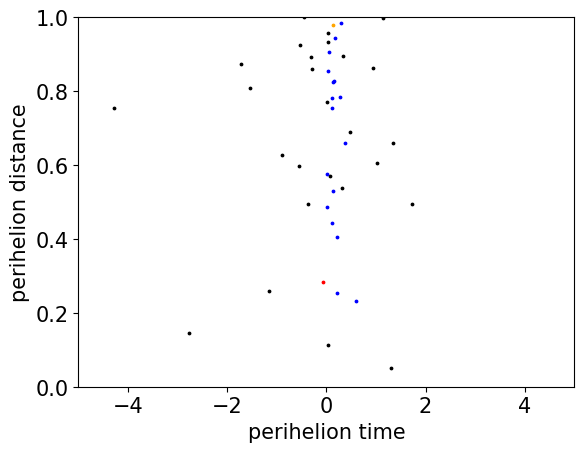

In [95]:
plt.scatter(t_per, d_per, 3, facecolor  = 'orange', edgecolor = 'orange', label='JWST RVS')
plt.scatter(Gaia_t_per, Gai_d_per, 3, facecolor = 'black', edgecolor = 'black', label='Gaia Sample')
plt.scatter(bim_dist_t,bim_dist_d, 3, facecolor = 'blue', edgecolor = 'blue', label='Low Vtan')
plt.scatter(BD_t_per,BD_d_per, 3, facecolor = 'red', edgecolor = 'red', label='UCD Sample')

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("perihelion time", fontsize = 15)
plt.ylabel("perihelion distance", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

### Can a Monte Carlo be Done to get a rough idea of the probability of any one of the objects approaching the 1 parsec limit?

Lets follow the same methodology as the gaia data!.

In [291]:
#idx	name	plx_formula	plxerr_formula	ref_plx_formula	pmra_formula	pmraerr_formula	pmdec_formula	pmdecerr_formula	ref_pm_formula	ra_j2000_formula	dec_j2000_formula	source_j2000_formula	SpT	PMTOT	Distance	Vtan


In [421]:
n_sample = 914
amin, amax = -100, 0
samples2 = np.zeros((0,))    # empty for now
while samples2.shape[0] < n_sample: 
    s = np.random.normal(-100, 35.0237, n_sample)
    Constraint2 = s[(s >= amin) & (s <= amax)]
    samples2 = np.concatenate([samples2, Constraint2])
samples2 = samples2[:n_sample]

n_sample = 913
amin, amax = 0, 100
sample = np.zeros((0,))    # empty for now
while sample.shape[0] < n_sample: 
    s = np.random.normal(100, 35.0237, n_sample)
    Constraint = s[(s >= amin) & (s <= amax)]
    sample = np.concatenate([sample, Constraint])
sample = sample[:n_sample]

Bimodal_RV_dist_mc = np.concatenate([sample, samples2])

In [1]:
plt.hist(Bimodal_RV_dist_mc)

NameError: name 'plt' is not defined

In [422]:
## pull out variables on interest

#source name
name = np.asarray(low_vtan['name'])

#radial velocity = X

# Kinematic values
Pmra = np.asarray(low_vtan['pmra_formula'])
Pmra_e = np.asarray(low_vtan['pmraerr_formula'])
Pmdec = np.asarray(low_vtan['pmdec_formula'])
Pmdec_e = np.asarray(low_vtan['pmdecerr_formula'])

Vtan = np.asarray(low_vtan['Vtan'])

plx = np.asarray(low_vtan['plx_formula'])
plxerr_formula_e = np.asarray(low_vtan['plxerr_formula'])

vtot = (np.sqrt(Vtan**2+Bimodal_RV_dist_mc**2))

In [423]:
len(Bimodal_RV_dist)

1827

In [424]:
Bimodal_RV_dist_mc

array([ 32.31109131995693  ,  92.92253155914383  ,  94.33265714673587  ,
        90.70667426953291  ,  86.6772423881011   ,  97.74736595210487  ,
        32.00956807517559  ,  54.58482772990849  ,  48.82517427493854  ,
        33.13241518714548  ,  19.664463338285714 ,  99.51149312769013  ,
        37.62881053263962  ,  77.14774642518879  ,  84.90406402530525  ,
        77.22323139475888  ,  89.83737378899966  ,  15.8389024398694   ,
        68.32770098189306  ,  67.01739103022791  ,  98.18472024747501  ,
        78.07577255665588  ,  99.60835489503611  ,  92.24308944536642  ,
        85.88648497082562  ,  78.10087247654585  ,  72.24491134504677  ,
        49.915916914996856 ,  43.45011897801829  ,   9.595952220840758 ,
        46.5286762230357   ,  88.6656957608341   ,  68.70390189044657  ,
        72.73296987448173  ,  51.552141002029    ,  93.80112007022848  ,
        39.98421478574476  ,  82.90489272069095  ,  25.08475146245476  ,
        96.84195278504805  ,  93.6683206237636   , 

(array([400., 282., 166.,  52.,  14.,  17.,  59., 162., 289., 386.]),
 array([-99.8408923316886     , -79.86262594017394    ,
        -59.8843595486593     , -39.90609315714465    ,
        -19.92782676563       ,   0.050439625884649786,
         20.028706017399287   ,  40.00697240891395    ,
         59.98523880042859    ,  79.96350519194323    ,
         99.94177158345789    ]),
 <BarContainer object of 10 artists>)

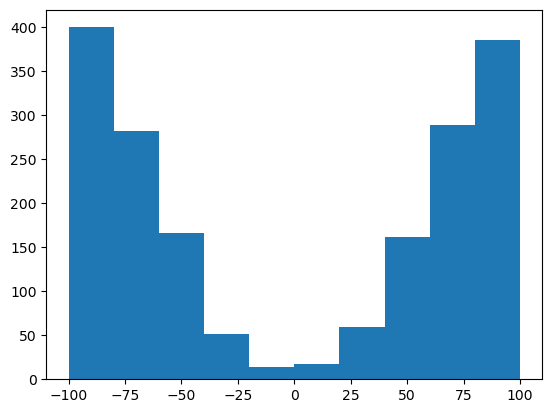

In [425]:
plt.hist(Bimodal_RV_dist_mc)

In [426]:
error = np.abs(np.random.randn(1827))

In [427]:
len(error)

1827

In [428]:
### Create arrays for everything
npts = 500
#error = np.random.normal(1,-1)
Bimodal_RV_dist_mc_array = np.zeros((len(low_vtan),npts))
#pmra_array = Bimodal_RV_dist_mc_array*0
#pmdec_array = Bimodal_RV_dist_mc_array*0
plx_array  = Bimodal_RV_dist_mc_array*0
vtot_array = Bimodal_RV_dist_mc_array*0
vtan_array = Bimodal_RV_dist_mc_array*0

#Creates a guassian distribbution from the error bars provided
for i in range(0,len(low_vtan)):
    Bimodal_RV_dist_mc_array[i,:] = np.random.normal(Bimodal_RV_dist_mc[i], npts)
    plx_array[i,:] = np.random.normal(plx[i], plxerr_formula_e[i], npts)
    #pmra_array[i,:] = np.random.normal(Pmra[i], Pmra_e[i], npts)
    #pmdec_array[i,:] = np.random.normal(Pmdec[i], Pmdec_e[i], npts)
    vtot_array[i,:] = np.random.normal(vtot[i],npts)
    vtan_array[i,:] = np.random.normal(Vtan[i],npts)

In [429]:
len(name)

1827

In [430]:
t_per=plx_array * 0
d_per=plx_array * 0

for i in range(0,len(name)):
    t_per[i,:] = -c1*(1/plx_array[i,:])*(Bimodal_RV_dist_mc_array[i,:]/vtot_array[i,:]**2)
    d_per[i,:] = 10**3*(1/plx_array[i,:])*(vtan_array[i,:]/vtot_array[i,:])

In [431]:
#Creates an empty array so the upper quartile from the vtan mc has a place to put new values
empty_vtan_array = []
for i in range(0,len(name)):
    high = np.quantile(vtan_array[i], [.5])
    
    empty_vtan_array.append(high)

vtan = np.hstack(empty_vtan_array)

In [432]:
#Creates empty arrayes to put the upper quartile and lower quantile for the perihelion distance
upper_d_quantile_array = []
lower_d_quantile_array = []
for i in range(0,len(name)):
    high = np.quantile(d_per[i], [.95])
    low = np.quantile(d_per[i], [.05])
    
    upper_d_quantile_array.append(high)
    lower_d_quantile_array.append(low)

high_err = np.hstack(upper_d_quantile_array)
low_err = np.hstack(lower_d_quantile_array)

In [433]:
#Creates empty arrayes to put the upper quartile and lower quantile for the perihelion time
upper_t_quantile_array = []
lower_t_quantile_array = []
for i in range(0,len(name)):
    high = np.quantile(t_per[i], [.95])
    low = np.quantile(t_per[i], [.05])
    
    upper_t_quantile_array.append(high)
    lower_t_quantile_array.append(low)

th_err = np.hstack(upper_t_quantile_array)
tl_err = np.hstack(lower_t_quantile_array)

In [434]:
y_err = high_err - low_err

In [435]:
x_err = th_err - tl_err

In [436]:
## calculate medians:
med_t_per = np.mean(t_per,axis=1)/10**6
med_d_per = np.mean(d_per,axis=1)
med_v_per = np.mean(vtot_array,axis=1)

In [376]:
med_t_per

array([  -0.026114930381081525,   -0.0214961882028124  ,
         -0.06930463657456343 ,    0.4543310007570375  ,
         -0.17919263785019712 ,    0.05630904316082805 ,
         -0.042411601241280336,   -0.10915771284599175 ,
         -0.04196850882580312 ,   -0.05654919321964458 ,
         -0.030979107686467958,   -0.0459573781373875  ,
         -0.021645270426786514,   -0.05867456351300395 ,
         -0.01933355345108366 ,   -0.05031817911943867 ,
         -0.022513233794907984,   -0.058482568714597984,
          2.2049889846335584  ,   -0.03335599336408135 ,
         -0.02007463863842661 ,   -0.049921572913748866,
         -0.03756811400647451 ,   -0.012777980059580446,
         -0.02371064196670588 ,   -0.02873897413906585 ,
         -0.06447458515990864 ,   -0.05913029145159074 ,
         -0.03164895899761864 ,    0.3136929922957992  ,
         -0.03594723401391065 ,   -0.191240554396343   ,
         -0.17301984276446625 ,   -0.05953632179299778 ,
         -0.026868337651597494,

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_14819/3555290708.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(med_t_per[np.argsort(med_d_per)[0:10]], med_d_per[np.argsort(med_d_per)[0:10]], y_err[np.argsort(med_d_per)[0:10]], x_err[np.argsort(med_d_per)[0:10]]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)


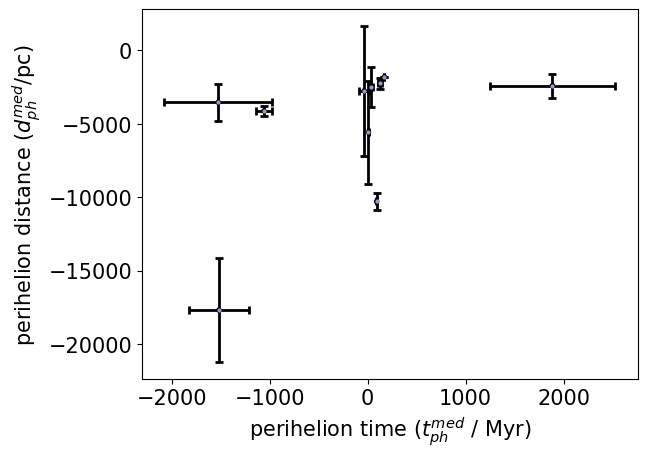

In [438]:
plt.scatter(med_t_per[np.argsort(med_d_per)[0:10]], med_d_per[np.argsort(med_d_per)[0:10]], facecolor = 'none', edgecolor = 'black', marker = ".")
plt.errorbar(med_t_per[np.argsort(med_d_per)[0:10]], med_d_per[np.argsort(med_d_per)[0:10]], y_err[np.argsort(med_d_per)[0:10]], x_err[np.argsort(med_d_per)[0:10]]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)

#xmin, xmax = plt.xlim(-5,5)
#ymin, ymax = plt.ylim(0,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [390]:
np.argsort(med_d_per)

array([ 778,  785,  344,  752,  711,  296,   39,  558, 1281,  743, 1393,
       1776, 1371,  721, 1814,  453,  973, 1543, 1015,  108,  997,  450,
        478, 1178,  386, 1004, 1753, 1528, 1181, 1783,  886, 1532,  372,
       1379, 1235,  790, 1350,  198, 1719, 1370,  910,  295, 1491,  747,
        929,  777,  895,  621,   26,  750, 1317,  316,  638, 1640, 1686,
        807,  635,  241, 1436, 1453, 1630, 1215,  757,  972, 1265,  248,
       1104,  789, 1733, 1566, 1484, 1223,  543,  528, 1333,  390, 1764,
        665, 1088,  520, 1732,  274, 1360,  950,  623,  161, 1145,  940,
       1079, 1108,  156, 1099,  257,  471,   23,  720, 1243,  255,  842,
       1249, 1334,  536,  931,  335,   96,  503, 1541,  251, 1271, 1190,
       1113,  767,  291, 1222,  673, 1424,  756,  733,  625,  443, 1720,
       1390,  183, 1310, 1498,  703,  680, 1254, 1071,  413,  245,  955,
        363, 1038,    1, 1255,  693, 1557,  639,  894,  668,  360, 1176,
        400, 1520,   67,   34, 1362,  867,   81, 13

In [354]:
name[1826]

'SDSS J104928.24+253723.2'